<a href="https://colab.research.google.com/github/grnbatera/IT305G/blob/main/Projeto_IT305G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT305G: Gestão de Energia e Eficiência Energética.
##Prof. Dr. Luiz Carlos Pereira da Silva e Prof. Msc João Ito.


# Análise de dados de Eficiência Energética através de Machine Learning 

Uma metodologia muito utilizado para analisar dados é o chamado ``CRISP-DM", por suas siglas em inglês: Cross-Industry Standard Process for Data Mining. O CRISP-DM tem seis etapas que são:

* **Business Understanding:** Definição dos objetivos, declaração do problema, * * pergunta de interesse.
* **Data Understanding:** Utilização de nosso conhecimento para coletar os dados.
* **Data Preparation:** Manipulação de dados para a eliminação de outliers e dados faltantes.
* **Modeling:** Modelo ou abordagem utilizado para estudar o comportamento de nosso sistema a partir de nossos dados.
* **Evaluation:** Avaliação dos resultados obtidos, no contexto se são de ajuda para responder nossa pergunta de interesse.
* **Deployment:** Disponibilizar o análise de dados.

# Business Understanding

* **Definição dos objetivos:** O objetivo do presente notebook é apresentar as variaveis disponíveis no banco de dados D1A.xlsx.
* **Declaração do problema:** O arquivo D1A.xlsx, reune um conjunto de informações disponíveis sobre anos-base de 2013 a 2019 compilados dos Resultados Anuais do Procel, do Balanço Energético Nacional, do Atlas da Eficiência Energética, do Anuário Estatítico de Energia Elétrica e do World Energy Trilemma Index.
* **Perguntas de Interesse:**
Há dados faltantes? Esses dados possuem alguma correlação? É possível estabelecer um modelo estatítico de predição de forma que possamos fazer uma tomada de decisão de política pública para a melhora da Eficiência Energética no país?

#Protocolos iniciais do Phyton

In [174]:
#Clonando repositório do GitHub
!git clone https://github.com/grnbatera/IT305G.git

Cloning into 'IT305G'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [175]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

##Modelo de gráficos pelo Seaborn

In [176]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set(font='Roboto',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
 
sns.set_context("notebook", rc={"font.size":20,
                                "axes.titlesize":24,
                                "axes.labelsize":18})

# Data Understanding

In [177]:
UC1 = pd.read_csv("/content/IT305G/D1A.csv")
UC1.shape

(7, 59)

In [178]:
UC1

,ano,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,rank
0,2013,70.6,7.6,1.1,0.00,11.3,4.4,2.4,2.6,570.0,31.95,33.93,10.05,9.12,4.59,4.09,59.6,40.4,16.7,83.3,71.2,28.8,86018,36528,2202,5,62.47,7.90,0.0,0.60,22.3,74.79,77294,16.9,0.0960,7,254.45,143.57,169.95,164.53,204.17,230.81,266.29,272.66,106,45921,64778,16661,7457,117309,1673,209237,9.744,0.935,3769,114.8,97.0,101.9,30
1,2014,65.2,7.3,2.0,0.00,13.0,6.9,2.5,3.2,624.3,32.48,32.87,10.33,9.33,4.75,4.21,59.1,40.9,17.5,82.5,72.3,27.7,89193,37827,4888,15,67.80,7.35,0.0,0.70,23.4,94.07,84319,17.9,0.1355,11,276.97,167.10,190.23,180.42,233.95,256.00,294.32,293.82,106,42653,60695,17416,7929,119942,1637,224444,10.517,1.425,2522,114.9,95.8,100.1,37
2,2015,64.0,8.0,3.5,0.01,12.9,4.8,2.4,4.5,581.5,32.24,32.47,10.65,9.57,4.82,4.41,58.9,41.1,20.7,79.3,72.5,27.5,91650,39563,7633,21,57.14,8.60,0.0,0.75,34.3,89.61,84613,18.3,0.1244,11,395.04,314.32,314.95,257.23,361.03,379.64,438.38,409.93,118,43632,57449,16258,7794,116119,1515,222825,11.680,1.453,2801,118.1,95.8,100.1,57
3,2016,68.1,8.2,5.4,0.01,9.1,3.7,2.6,2.9,619.7,32.40,33.00,10.30,9.70,4.90,4.00,58.0,42.0,20.0,80.0,64.0,36.0,96925,41276,10124,24,78.50,6.10,0.3,1.00,14.1,64.44,88097,19.2,0.0817,7,419.15,316.26,329.51,274.67,360.53,400.28,466.61,434.87,73,43264,57357,16494,9627,110714,2541,221709,15.500,1.238,3634,126.0,96.7,97.3,54
4,2017,65.2,8.2,6.8,0.10,10.5,3.0,2.5,3.6,624.3,32.70,32.90,10.10,9.70,4.80,4.00,57.0,43.0,20.0,80.0,63.0,37.0,100275,41628,12283,935,46.20,23.50,5.0,2.50,22.8,61.14,89139,19.2,0.0927,8,421.35,361.37,322.51,293.06,348.07,397.01,478.38,434.91,72,42892,57811,16652,10480,114950,1401,222903,21.200,1.965,6887,126.6,100.0,97.0,53
5,2018,66.6,8.5,7.6,0.50,8.6,2.4,2.5,3.2,636.4,32.70,31.70,11.20,9.90,4.90,4.10,57.0,43.0,23.0,77.0,65.0,35.0,104139,40523,14390,1798,63.50,19.10,1.7,1.80,13.9,52.70,90135,19.1,0.0740,7,474.99,308.92,358.51,338.06,402.24,443.92,540.78,489.76,65,41561,61377,17219,8912,116723,1301,227662,22.990,1.701,7257,128.5,100.0,96.8,39
6,2019,64.9,8.4,8.6,1.00,9.3,2.0,2.5,3.3,651.3,32.70,30.40,11.20,10.30,5.10,4.90,58.0,42.0,25.0,75.0,66.0,34.0,109058,41219,15378,2473,74.50,13.90,1.3,0.70,9.5,56.30,92515,19.3,0.0750,7,511.92,314.20,383.36,336.16,399.64,472.53,577.15,529.27,61,39215,60001,17806,9208,120170,1320,234444,21.600,1.600,8129,128.7,100.5,95.0,28


In [179]:
mapa = pd.read_csv("/content/IT305G/mapadevariaveisdeD1A.csv")
mapa.shape

(59, 2)

# Data Preparation

##Normalização dos Dados

In [78]:
UC1n = (UC1-UC1.mean(axis=0))/UC1.std(axis=0)
anomedia = 2016
anostd = 2.160246899
rankmedia = 42.57142857
rankstd = 11.98411647

##Divsão e ajuste dos dados para treino e teste

In [79]:
treino=UC1n.iloc[[0,1,2,3,6]]
anotreino=treino.iloc[:,0:58]
ranktreino=treino.iloc[:,58:]
teste=UC1n.iloc[[4,5]]
anoteste=teste.iloc[:,0:58]
rankteste=teste.iloc[:,58:]

In [80]:
anoteste=np.array(anoteste).reshape(len(anoteste),58)
anotreino=np.array(anotreino).reshape(len(anotreino),58)
rankteste=np.array(rankteste).reshape(len(rankteste),1)
ranktreino=np.array(ranktreino).reshape(len(ranktreino),1)

In [81]:
anoteste.shape

(2, 58)

In [82]:
anotreino.shape

(5, 58)

In [83]:
ranktreino.shape

(5, 1)

In [84]:
rankteste.shape

(2, 1)

## Visualização de Dados Faltantes

In [85]:
np.nan + np.nan

nan

In [86]:
np.nan == np.nan

False

In [87]:
np.isnan(np.nan)

True

In [88]:
import missingno as msno

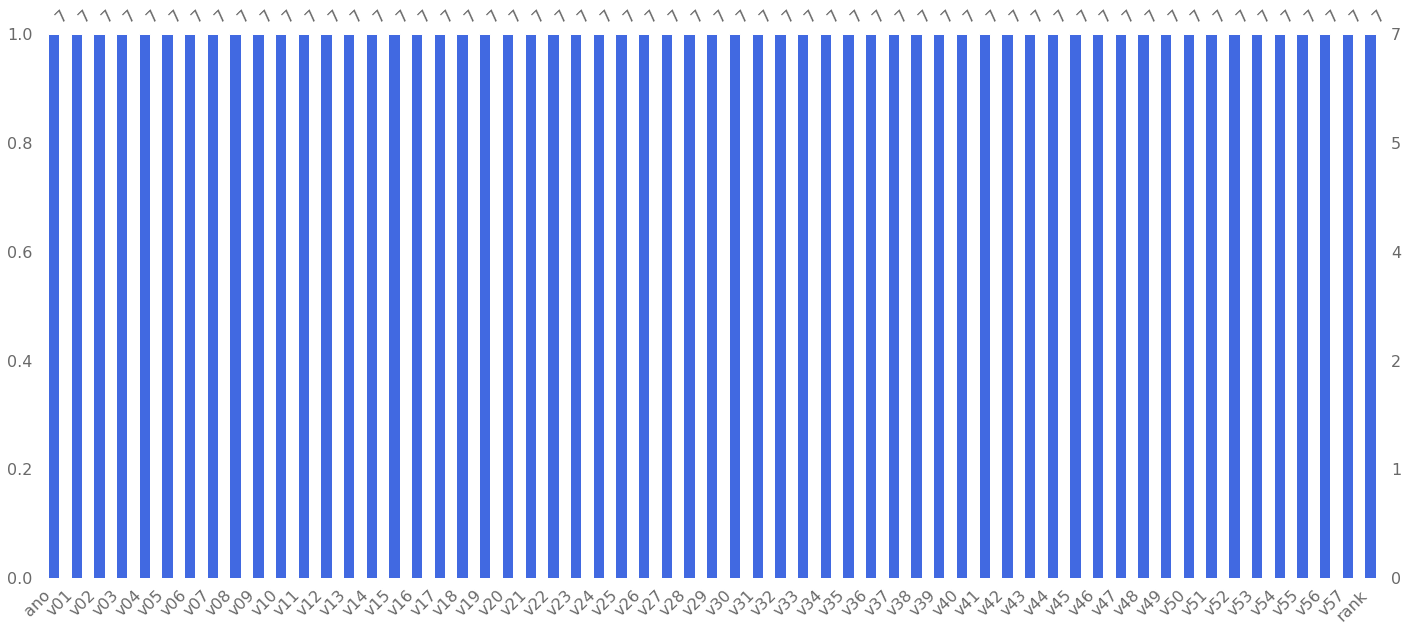

In [89]:
msno.bar(UC1, labels=True,color="RoyalBlue") #para visualizar a integridade do datafram

## Matriz de Dados Faltantes

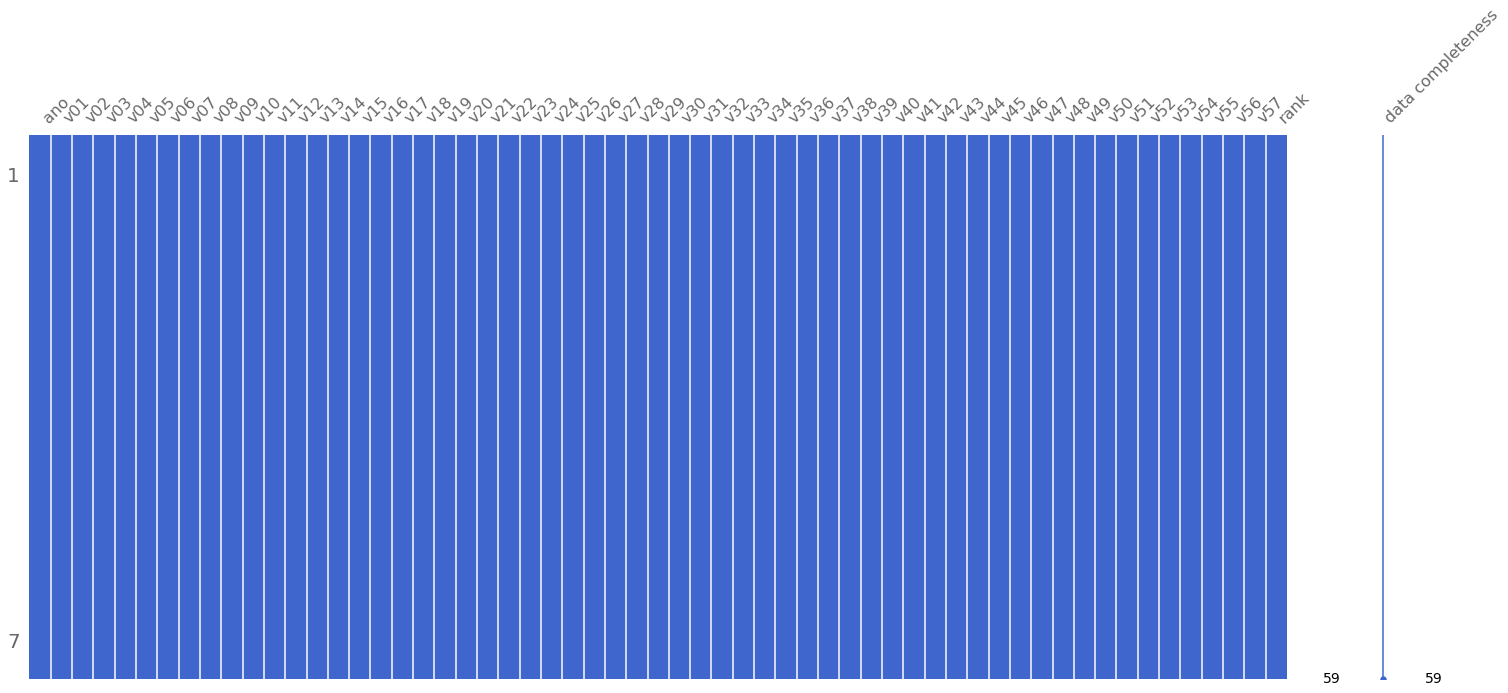

In [90]:
msno.matrix(UC1, labels=True, color = (0.25,0.4,0.8))

## Matriz de Correlação de Dados Faltantes

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


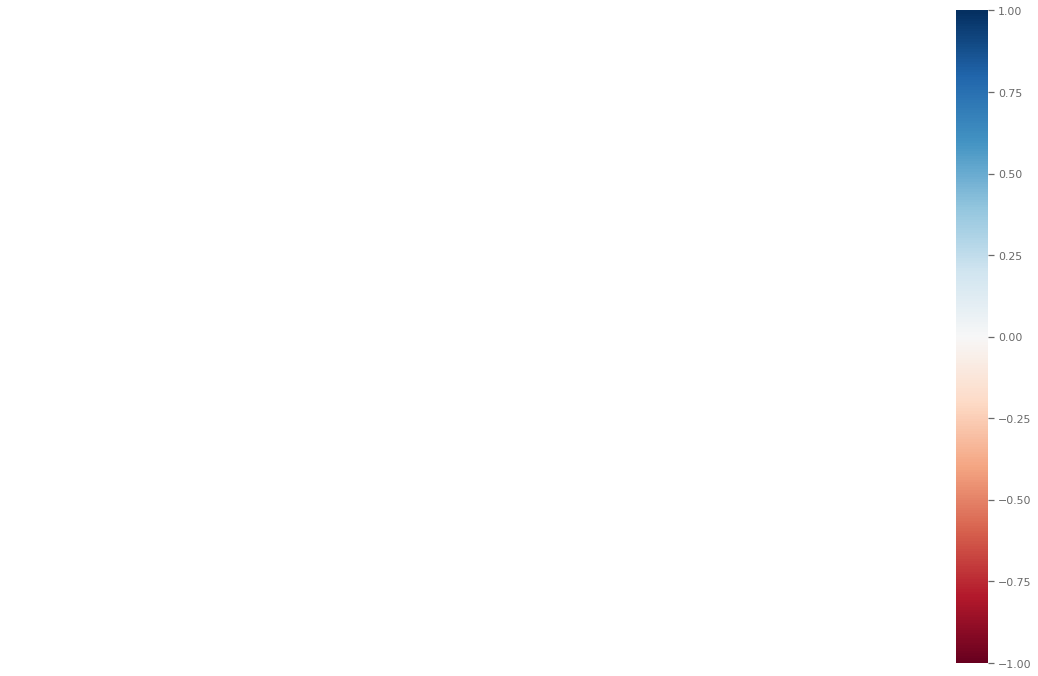

In [91]:
msno.heatmap(UC1,labels=True)

## Dendogram de dados Faltantes

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2865: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim([dvw, 0])


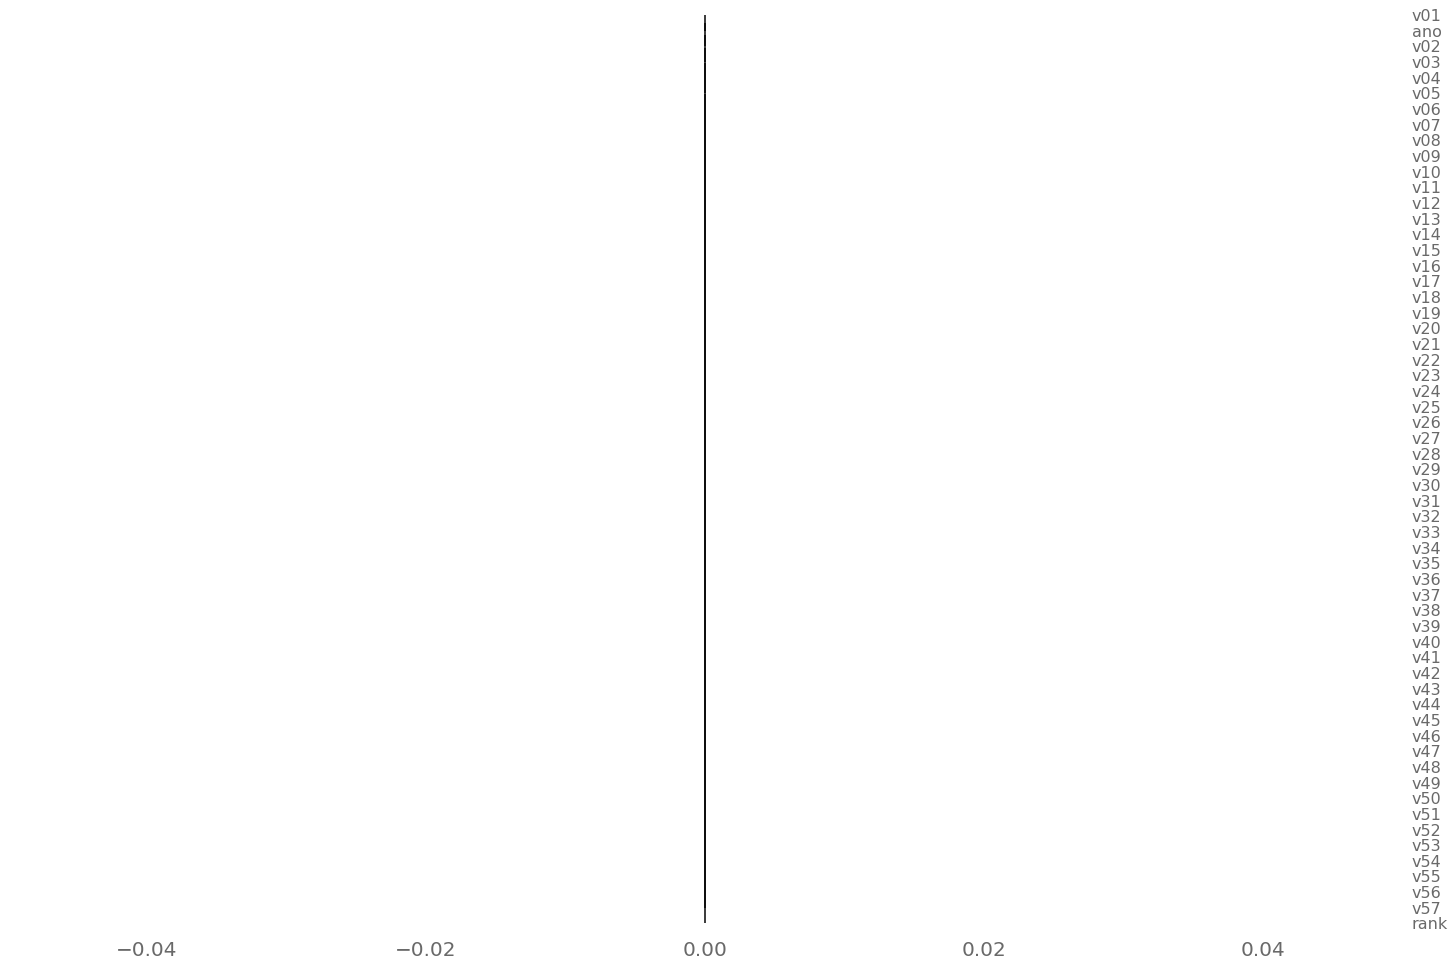

In [92]:
msno.dendrogram(UC1)

##Modelo de Avaliação

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [93]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

#Modeling: Regressões Não-Lineares por Machine Learning

##Regressão Multivariável

In [94]:
modelo01 = LinearRegression().fit(anotreino,ranktreino)

In [95]:
modelo01.score(anotreino,ranktreino)

1.0

In [96]:
modelo01.score(anoteste,rankteste)

0.6575994921653434

In [97]:
rmsmodelo01 = RMSE(rankteste.ravel(), modelo01.predict(anoteste).ravel())
rmsmodelo01

0.3417898951320977

In [98]:
predicao01 = (modelo01.predict(anoteste))*rankstd+rankmedia
predicao01.ravel()

array([48.10283144, 35.90597513])

In [99]:
importancia01a = pd.DataFrame(modelo01.coef_).T
importancia01 = importancia01a.sort_values(by=0,ascending=False)
importancia01.head()

,0
8,0.108742
37,0.095114
50,0.088605
30,0.083740
40,0.072880


##Regressão por Árvore de Decisão

In [100]:
modelo02 = tree.DecisionTreeRegressor(max_depth=2,random_state=18).fit(anotreino,ranktreino)

In [101]:
modelo02.score(anotreino,ranktreino)

0.9972632731253421

In [102]:
modelo02.score(anoteste,rankteste)

-0.030612244897959103

In [103]:
rmsmodelo02 = RMSE(rankteste.ravel(), modelo02.predict(anoteste).ravel())
rmsmodelo02

0.5929794839916582

In [104]:
predicao02 = (modelo02.predict(anoteste))*rankstd+rankmedia
predicao02.ravel()

array([54., 29.])

In [105]:
importancia02a = pd.DataFrame((modelo02.feature_importances_))
importancia02 = importancia02a.sort_values(by=0,ascending=False)
importancia02.head()

,0
37,0.935282
35,0.058544
56,0.006175
0,0.000000
43,0.000000


##Regressão por Árvore de Decisão com AdaBoost

In [106]:
modelo03 =  AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=4), loss='exponential',n_estimators=4, random_state=400).fit(anotreino,ranktreino.ravel())

In [107]:
modelo03.score(anotreino,ranktreino)

0.8891625615763546

In [108]:
modelo03.score(anoteste,rankteste)

0.9489795918367349

In [109]:
rmsmodelo03 = RMSE(rankteste.ravel(), modelo03.predict(anoteste).ravel())
rmsmodelo03

0.1319362035368364

In [110]:
predicao03 = (modelo03.predict(anoteste))*rankstd+rankmedia
predicao03.ravel()

array([54., 37.])

In [111]:
importancia03a = pd.DataFrame((modelo03.feature_importances_))
importancia03 = importancia03a.sort_values(by=0,ascending=False)
importancia03.head()

,0
2,0.305600
45,0.276745
46,0.222966
52,0.172757
29,0.018597


##Regressão por AdaBoost

In [112]:
modelo04 =  AdaBoostRegressor(n_estimators=40).fit(anotreino,ranktreino.ravel())

In [113]:
modelo04.score(anotreino,ranktreino)

1.0

In [114]:
modelo04.score(anoteste,rankteste)

0.9489795918367349

In [115]:
rmsmodelo04 = RMSE(rankteste.ravel(), modelo04.predict(anoteste).ravel())
rmsmodelo04

0.1319362035368364

In [116]:
predicao04 = (modelo03.predict(anoteste))*rankstd+rankmedia
predicao04.ravel()

array([54., 37.])

In [117]:
importancia04a = pd.DataFrame((modelo04.feature_importances_))
importancia04 = importancia04a.sort_values(by=0,ascending=False)
importancia04.head()

,0
29,0.082999
37,0.068108
15,0.061632
26,0.057488
46,0.050358


##Regressão com GradientBoosting

In [118]:
modelo05 =  GradientBoostingRegressor(n_estimators=300).fit(anotreino,ranktreino.ravel())

In [119]:
modelo05.score(anotreino,ranktreino)

0.9999999060685005

In [120]:
modelo05.score(anoteste,rankteste)

0.9053577467545587

In [121]:
rmsmodelo05 = RMSE(rankteste.ravel(), modelo05.predict(anoteste).ravel())
rmsmodelo05

0.17969440477639811

In [122]:
predicao05 = (modelo05.predict(anoteste))*rankstd+rankmedia
predicao05.ravel()

array([51.80776161, 36.19758881])

In [123]:
importancia05a = pd.DataFrame((modelo05.feature_importances_))
importancia05 = importancia05a.sort_values(by=0,ascending=False)
importancia05.head()

,0
49,0.429088
29,0.239168
37,0.145746
47,0.087572
46,0.031195


##Regressão por Bagging

In [124]:
modelo06 =  BaggingRegressor(n_estimators=300).fit(anotreino,ranktreino.ravel())

In [125]:
modelo06.score(anotreino,ranktreino)

0.812289728151798

In [126]:
modelo06.score(anoteste,rankteste)

0.3255128117913828

In [127]:
rmsmodelo06 = RMSE(rankteste.ravel(), modelo06.predict(anoteste).ravel())
rmsmodelo06

0.4797101096972128

In [128]:
predicao06 = (modelo06.predict(anoteste))*rankstd+rankmedia
predicao06.ravel()

array([44.87      , 38.94666667])

##Regressão por Random Forrest

In [129]:
modelo07 =  RandomForestRegressor(n_estimators=160).fit(anotreino,ranktreino.ravel())

In [130]:
modelo07.score(anotreino,ranktreino)

0.8241439710762176

In [131]:
modelo07.score(anoteste,rankteste)

0.30460738201530724

In [132]:
rmsmodelo07 = RMSE(rankteste.ravel(), modelo07.predict(anoteste).ravel())
rmsmodelo07

0.48708758107757477

In [133]:
predicao07 = (modelo07.predict(anoteste))*rankstd+rankmedia
predicao07.ravel()

array([44.78125, 38.225  ])

In [134]:
importancia07a = pd.DataFrame((modelo07.feature_importances_))
importancia07 = importancia07a.sort_values(by=0,ascending=False)
importancia07.head()

,0
37,0.082225
46,0.066427
29,0.058254
47,0.057886
44,0.042298


##Regressão por Support Vector Regressor - Kernel RBF

In [135]:
modelo08 =  SVR(kernel='rbf', C=4).fit(anotreino,ranktreino.ravel())

In [136]:
modelo08.score(anotreino,ranktreino)

0.9901571764140344

In [137]:
modelo08.score(anoteste,rankteste)

0.14471751980583203

In [138]:
rmsmodelo08 = RMSE(rankteste.ravel(), modelo08.predict(anoteste).ravel())
rmsmodelo08

0.540190331461215

In [139]:
predicao08 = (modelo08.predict(anoteste))*rankstd+rankmedia
predicao08.ravel()

array([43.92770857, 37.77068662])

##Regressão por Support Vector Regressor - Kernel Linear

In [140]:
modelo09 =  SVR(kernel='linear', C=200, gamma='auto').fit(anotreino,ranktreino.ravel())

In [141]:
modelo09.score(anotreino,ranktreino)

0.9901686520518388

In [142]:
modelo09.score(anoteste,rankteste)

0.6126893919925578

In [143]:
rmsmodelo09 = RMSE(rankteste.ravel(), modelo09.predict(anoteste).ravel())
rmsmodelo09

0.36351447986132845

In [144]:
predicao09 = (modelo09.predict(anoteste))*rankstd+rankmedia
predicao09.ravel()

array([47.47406691, 36.27593997])

In [145]:
importancia09a = pd.DataFrame(modelo09.coef_).T
importancia09 = importancia09a.sort_values(by=0,ascending=False)
importancia09.head()

,0
8,0.098491
37,0.084941
50,0.080283
30,0.075869
40,0.064908


##Regressão por Support Vector Regressor - Kernel Polynomial

In [146]:
modelo10 =  SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1).fit(anotreino,ranktreino.ravel())

In [147]:
modelo10.score(anotreino,ranktreino)

0.9901830755602106

In [148]:
modelo10.score(anoteste,rankteste)

0.7330552864367361

In [149]:
rmsmodelo10 = RMSE(rankteste.ravel(), modelo10.predict(anoteste).ravel())
rmsmodelo10

0.3017884963085526

In [150]:
predicao10 = (modelo10.predict(anoteste))*rankstd+rankmedia
predicao10.ravel()

array([48.90240883, 42.06109924])

In [180]:
mapa.head()

,Variavel,Descricao
0,ano,Ano-Base
1,v01,Oferta Energia Renovavel - Hidraulica(%)
2,v02,Oferta Energia Renovavel - Biomassa(%)
3,v03,Oferta Energia Renovavel - Eolica(%)
4,v04,Oferta Energia Renovavel - Solar(%)


In [195]:
rank01=pd.DataFrame(modelo01.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank02=pd.DataFrame(modelo02.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank03=pd.DataFrame(modelo03.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank04=pd.DataFrame(modelo04.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank05=pd.DataFrame(modelo05.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank06=pd.DataFrame(modelo06.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank07=pd.DataFrame(modelo07.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank08=pd.DataFrame(modelo08.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank09=pd.DataFrame(modelo09.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia
rank10=pd.DataFrame(modelo10.predict(UC1n.iloc[:,0:58]))*rankstd+rankmedia

#Evaluation

##Análise de gráficos das regressões por Machine Learning

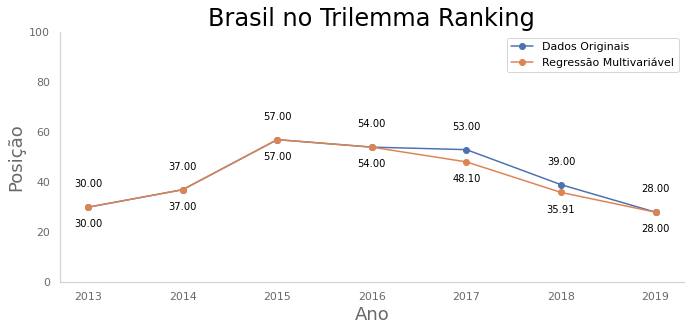

In [197]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank01[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank01[0], marker='o',label='Regressão Multivariável')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g01.jpg', format='jpg', dpi=600)


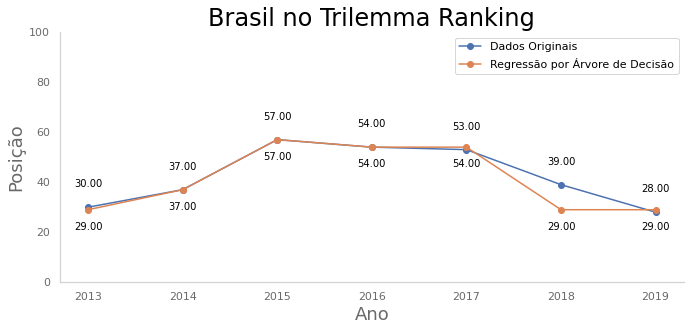

In [198]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank02[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank02[0], marker='o',label='Regressão por Árvore de Decisão')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g02.jpg', format='jpg', dpi=600)


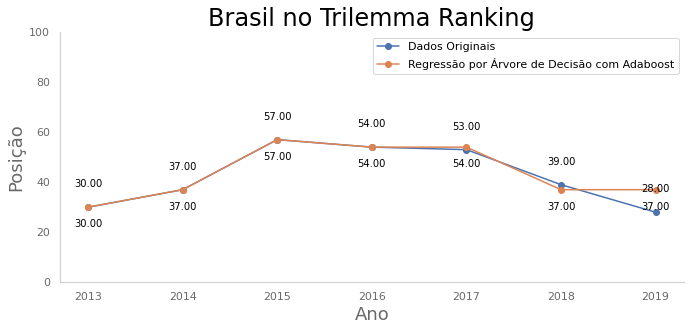

In [199]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank03[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank03[0], marker='o',label='Regressão por Árvore de Decisão com Adaboost')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g03.jpg', format='jpg', dpi=600)


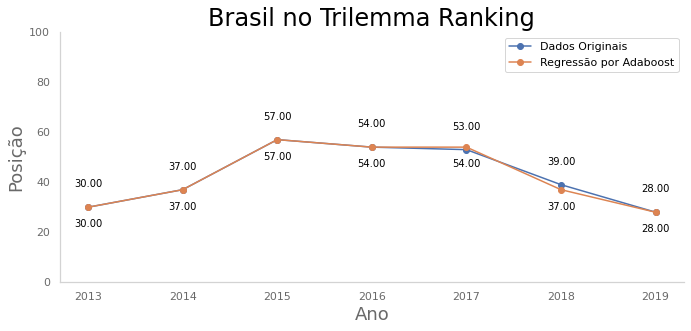

In [200]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank04[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank04[0], marker='o',label='Regressão por Adaboost')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g04.jpg', format='jpg', dpi=600)


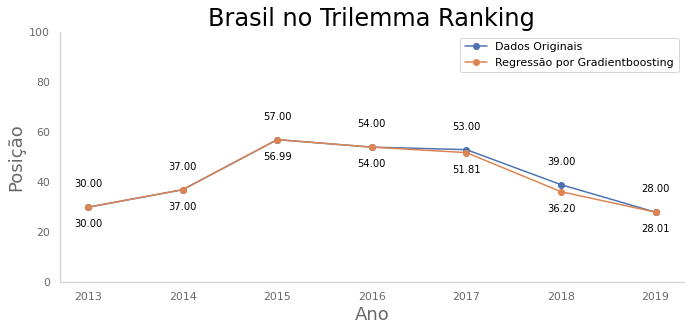

In [201]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank05[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank05[0], marker='o',label='Regressão por Gradientboosting')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g05.jpg', format='jpg', dpi=600)


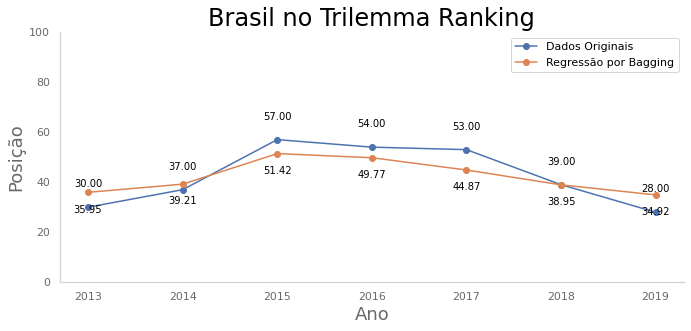

In [208]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank06[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank06[0], marker='o',label='Regressão por Bagging')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g06.jpg', format='jpg', dpi=600)


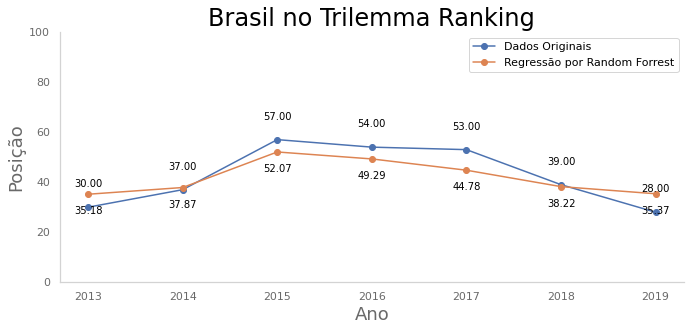

In [203]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank07[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank07[0], marker='o',label='Regressão por Random Forrest')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g07.jpg', format='jpg', dpi=600)


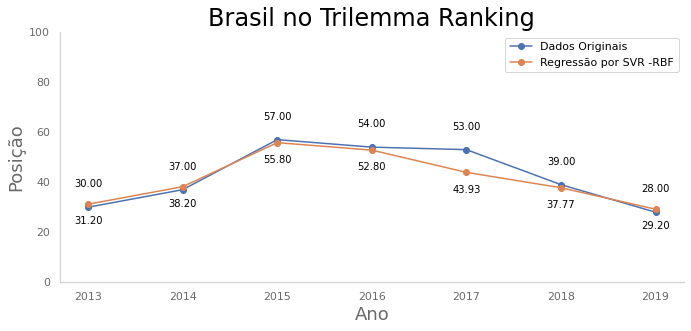

In [209]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank08[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank08[0], marker='o',label='Regressão por SVR -RBF')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g08.jpg', format='jpg', dpi=600)


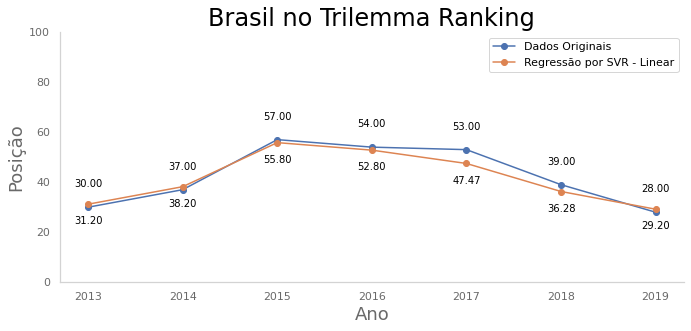

In [210]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank09[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank09[0], marker='o',label='Regressão por SVR - Linear')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g09.jpg', format='jpg', dpi=600)


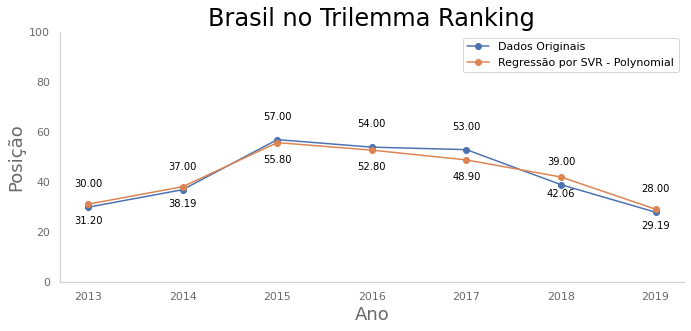

In [211]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(10, 5))
plt.title('Brasil no Trilemma Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição')
for x,y in zip(UC1['ano'],UC1['rank']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],UC1['rank'], marker='o',label='Dados Originais')
for x,y in zip(UC1['ano'],rank10[0]):

    labely = "{:.2f}".format(y)
    plt.annotate(labely, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),
                 fontsize=10,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(UC1['ano'],rank10[0], marker='o',label='Regressão por SVR - Polynomial')
plt.xticks(UC1['ano'])
plt.ylim([0,100])
#plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('/content/IT305G/g10.jpg', format='jpg', dpi=600)
